In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
# Unzip dataset
zip_ref = zipfile.ZipFile('political-social-media-posts.zip', 'r')
zip_ref.extractall('.')
zip_ref.close()

In [3]:
# Load in dataset with Latin-1 encoding
dataset = pd.read_csv('political_social_media.csv', encoding="ISO-8859-1")

In [4]:
# shape
print(dataset.shape)
# head
print(dataset.head(20))

(5000, 21)
     _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0   766192484    False   finalized                   1      8/4/15 21:17   
1   766192485    False   finalized                   1      8/4/15 21:20   
2   766192486    False   finalized                   1      8/4/15 21:14   
3   766192487    False   finalized                   1      8/4/15 21:08   
4   766192488    False   finalized                   1      8/4/15 21:26   
5   766192489    False   finalized                   2      8/4/15 21:06   
6   766192490    False   finalized                   1      8/4/15 21:07   
7   766192491    False   finalized                   1      8/4/15 20:51   
8   766192492    False   finalized                   1      8/4/15 20:57   
9   766192493    False   finalized                   2      8/4/15 21:14   
10  766192494    False   finalized                   1      8/4/15 20:35   
11  766192495    False   finalized                   1      8/4/15 21:15   
1

In [5]:
# high-level descriptions of fields we're interested in
print(dataset.describe(include=[np.object])['message'])
print(dataset.describe(include=[np.object])['source'])
print(dataset.describe(include=[np.object])['bias'])

count       5000
unique         9
top       policy
freq        1411
Name: message, dtype: object
count        5000
unique          2
top       twitter
freq         2500
Name: source, dtype: object
count        5000
unique          2
top       neutral
freq         3689
Name: bias, dtype: object


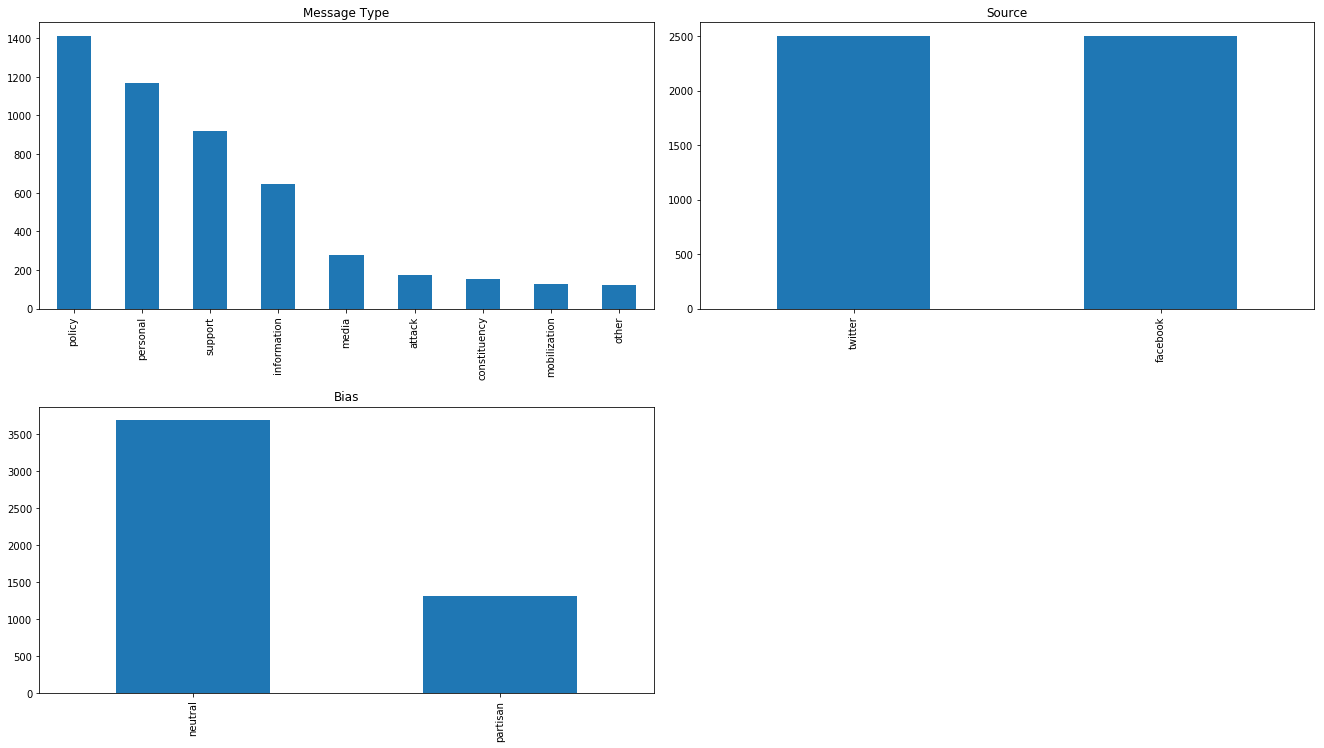

In [6]:
fig1 = plt.figure(1)
fig1.set_size_inches(18.5, 10.5)
plt.subplot(221)
plt.title('Message Type')
pd.value_counts(dataset['message']).plot.bar()
plt.subplot(222)
plt.title('Source')
pd.value_counts(dataset['source']).plot.bar()
plt.subplot(223)
plt.title('Bias')
pd.value_counts(dataset['bias']).plot.bar()
plt.tight_layout()

In [7]:
neutral_messages = dataset[(dataset.bias == 'neutral')]
partisan_messages = dataset[(dataset.bias == 'partisan')]

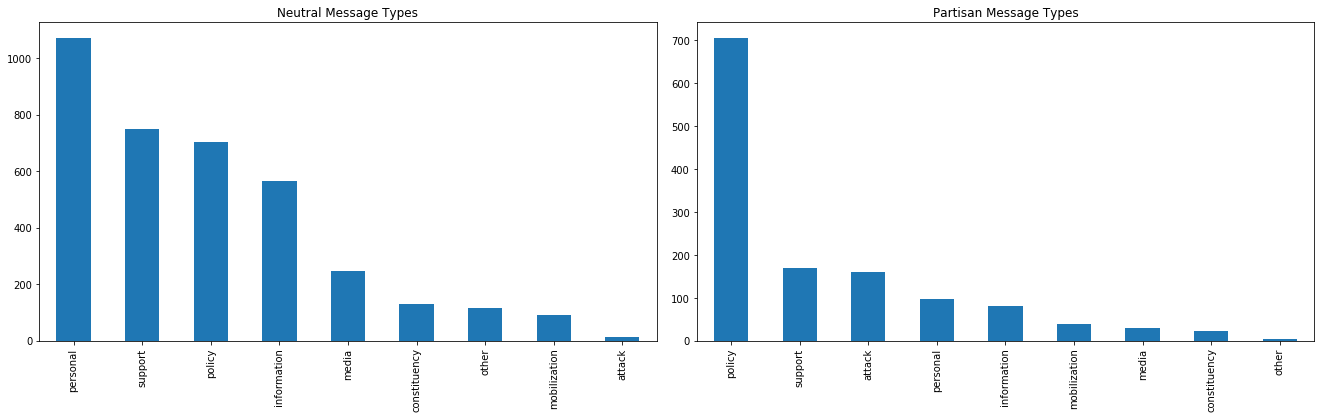

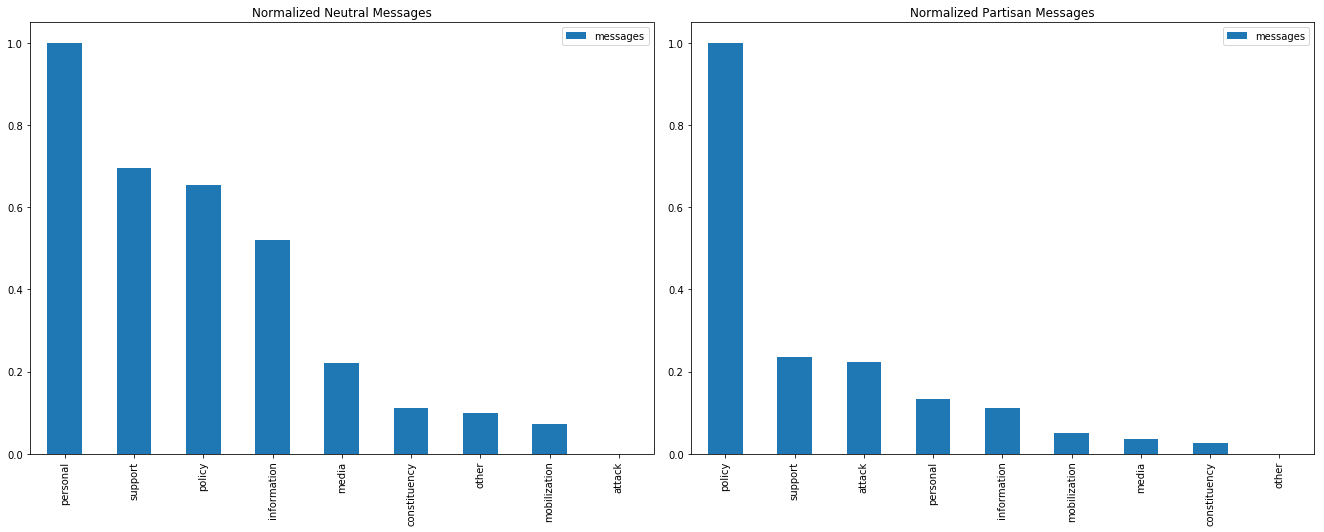

In [8]:
fig2 = plt.figure(2)

fig2.set_size_inches(18.5, 10.5)
plt.subplot(221)
plt.title('Neutral Message Types')
neutral_counts = pd.value_counts(neutral_messages['message'])
neutral_counts.plot.bar()
plt.subplot(222)
plt.title('Partisan Message Types')
partisan_counts = pd.value_counts(partisan_messages['message'])
partisan_counts.plot.bar()
plt.tight_layout()
#########

fig3, axes = plt.subplots(nrows=1, ncols=2)
fig3.set_size_inches(18.5, 7.5)
neutral_df = neutral_counts.to_frame(name="messages")
normalized_neutral_df = (neutral_df-neutral_df.min())/(neutral_df.max()-neutral_df.min())
normalized_neutral_df.plot(kind='bar', ax=axes[0], sharex=False, sharey=False, title="Normalized Neutral Messages")
partisan_df = partisan_counts.to_frame(name="messages")
normalized_partisan_df = (partisan_df-partisan_df.min())/(partisan_df.max()-partisan_df.min())
normalized_partisan_df.plot(ax=axes[1], kind='bar',sharex=False, sharey=False, title="Normalized Partisan Messages")
plt.tight_layout()

In [9]:
from keras.preprocessing.text import text_to_word_sequence
from keras.datasets import imdb

idx = imdb.get_word_index()
idx2word = {v: k for k, v in idx.items()}

def one_hot_encoding(message):
    return 0 if message == "attack" else 1

def word_to_idx(words):
    return [idx[word] if (word in idx and idx[word] <= 5000) else 5000 for word in words]

attack_or_support_df = dataset[(dataset.message == 'attack') | (dataset.message == 'support')][['message','text']]
attack_or_support_df = attack_or_support_df.reset_index(drop=True)
attack_or_support_df['message'] = attack_or_support_df['message'].apply(one_hot_encoding)
attack_or_support_df['text'] = attack_or_support_df['text'].apply(lambda x: word_to_idx(text_to_word_sequence(x)))
attack_or_support_df

Using TensorFlow backend.


,message,text
0,0,"[371, 5000, 365, 4, 1928, 2202, 2, 1909, 4928,..."
1,1,"[588, 2880, 69, 636, 8, 5000, 260, 2914, 1734,..."
2,1,"[84, 5000, 1656, 31, 5000, 5000, 41, 5000, 500..."
3,0,"[1, 2214, 5000, 76, 5, 40, 1194, 26, 5000, 37,..."
4,1,"[15, 3362, 5000, 1858, 5000, 3281, 22, 212, 19..."
5,1,"[1, 310, 77, 2299, 11, 1266, 5, 5000, 2, 398, ..."
6,1,"[5000, 5, 3959, 467, 5000, 69, 8, 5000, 5, 149..."
7,1,"[3, 84, 165, 142, 30, 30, 5000, 2171, 295, 500..."
8,1,"[11, 5000, 297, 5000, 371, 6, 20, 86, 5000, 50..."
9,0,"[374, 985, 26, 2, 24, 366, 23, 1568, 20, 5000,..."


In [10]:
attack_or_support_df['text']

0       [371, 5000, 365, 4, 1928, 2202, 2, 1909, 4928,...
1       [588, 2880, 69, 636, 8, 5000, 260, 2914, 1734,...
2       [84, 5000, 1656, 31, 5000, 5000, 41, 5000, 500...
3       [1, 2214, 5000, 76, 5, 40, 1194, 26, 5000, 37,...
4       [15, 3362, 5000, 1858, 5000, 3281, 22, 212, 19...
5       [1, 310, 77, 2299, 11, 1266, 5, 5000, 2, 398, ...
6       [5000, 5, 3959, 467, 5000, 69, 8, 5000, 5, 149...
7       [3, 84, 165, 142, 30, 30, 5000, 2171, 295, 500...
8       [11, 5000, 297, 5000, 371, 6, 20, 86, 5000, 50...
9       [374, 985, 26, 2, 24, 366, 23, 1568, 20, 5000,...
10      [5000, 5000, 3, 159, 1117, 3120, 5000, 5000, 8...
11      [5000, 44, 74, 3, 4324, 1068, 5000, 5000, 24, ...
12      [5000, 5000, 3534, 5000, 20, 5000, 3362, 456, ...
13      [2425, 5000, 6, 2645, 142, 50, 5, 175, 5000, 5...
14      [5000, 5000, 2756, 5000, 5000, 5000, 5000, 388...
15      [5000, 1, 5000, 601, 636, 20, 1, 2187, 5000, 5...
16      [84, 5, 64, 5000, 5000, 4262, 1230, 5000, 5000...
17      [5000,

In [11]:
lengths = [0]*len(attack_or_support_df['text'])
for index, x in enumerate(attack_or_support_df['text']):
    lengths[index] =len(x)
print("Mean %.2f words (%f)" % (np.mean(lengths), np.std(lengths)))

Mean 34.02 words (46.187578)


In [12]:
attack_indices = attack_or_support_df.index[attack_or_support_df['message'] == 0].tolist()
support_indices = attack_or_support_df.index[attack_or_support_df['message'] == 1].tolist()
validation_indices = random.sample(range(len(attack_indices)), int(0.20*len(attack_indices))) + random.sample(range(len(support_indices)), int(0.20*len(support_indices)))


In [13]:
len(validation_indices)

218

In [14]:
y_test = attack_or_support_df.iloc[validation_indices]['message'].tolist()
x_test = attack_or_support_df.iloc[validation_indices]['text'].tolist()
y_train = attack_or_support_df[~attack_or_support_df.index.isin(validation_indices)]['message'].tolist()
x_train = attack_or_support_df[~attack_or_support_df.index.isin(validation_indices)]['text'].tolist()

In [15]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [16]:
x_test = sequence.pad_sequences(x_test, maxlen=100)
x_train = sequence.pad_sequences(x_train, maxlen=100)

In [17]:
seed = 7
np.random.seed(seed)

In [19]:
model = Sequential()
model.add(Embedding(5001, 32, input_length=100))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           160032    
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               800250    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 960,533
Trainable params: 960,533
Non-trainable params: 0
_________________________________________________________________
None
Train on 885 samples, validate on 218 samples
Epoch 1/2
0s - loss: 0.5022 - acc: 0.8520 - val_loss: 0.6107 - val_acc: 0.7936
Epoch 2/2
0s - loss: 0.4295 - acc: 0.8554 - val_loss: 0.5034 - val_acc: 0.7936
Accuracy: 79.36%
